In [1]:
import os
import itertools

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Custom settings for libraries used
import settings.custom

# Custom functions for dealing with local files
import utilities

In [2]:
def create_heatmap(df: pd.DataFrame, **kwargs):
        
        stats = sum([
            ['fpts', 'mp', 'usg', 'ts', 'ast_pct', 'pts', 'pace'],
            [stat_ for stat_ in kwargs.get('stats', []) if stat_ not in stats]
        ], list())
        
        output = [
            f'Stats included: {", ".join(stats[:-1])} and {stats[-1]}',
        ]
        
        startervals = (0,1)
        if 'starter' in kwargs:
            startervals = (int(kwargs['starter']), )
            output.append(f'Considering stats for {"starters" if startervals[0] == 1 else "bench"} only.')
        
        df = (df
              .loc[df['starter'].isin(startervals)]
              [stats]
             )

        # Conditional included to check if just starters or not

        output = [f'Sample size: {df.shape[0]:,}'] + output

        # Include product of stats
        if 'product' in kwargs:
            product_str = 'Product columns:'
            for cols in itertools.combinations(kwargs['product'], 2):
                df['*'.join(cols)] = df[cols[0]]*df[cols[1]]
                # stats.append(cols)
                product_str += f' {cols},'

            if 'combos' in kwargs:
                for n in range(3, kwargs['combos']+1):
                    for cols in itertools.combinations(kwargs['product'], n):
                        df['*'.join(cols)] = functools.reduce(product, [df[col_] for col_ in cols])
                        # stats.append(cols)
                        product_str += f' {cols},'
            output.append(product_str)

        # Correlations dataframe
        corr: pd.DataFrame = df.corr()
            
        # Better size
        fig, ax = plt.subplots(figsize=kwargs.get('figsize', (15,10)))
        mask: np.ndarray = np.triu(np.ones_like(corr, dtype=bool))
        
        # Preferred kwargs for heatmap that are not defaults
        sns_kwargs: dict[str,str|float] = {
            'cmap': kwargs.get('cmap', 'jet_r'),
            'vmin': kwargs.get('vmin', 0.3),
            'vmax': kwargs.get('vmax', 1.0)
            
        }

        print(*output, sep='\n')
        
        return sns.heatmap(
            corr, 
            mask=mask,
            **sns_kwargs
        )

In [3]:
df = utilities.load_raw_dataset('2023-2024', site='draftkings')

In [4]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17665 entries, 0 to 17664
Data columns (total 53 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              17665 non-null  object 
 1   name              17665 non-null  object 
 2   starter           17665 non-null  int64  
 3   team              17665 non-null  object 
 4   opp               17665 non-null  object 
 5   home              17665 non-null  int64  
 6   score             17665 non-null  int64  
 7   opp_score         17665 non-null  int64  
 8   winner            17665 non-null  int64  
 9   spread            17665 non-null  int64  
 10  total             17665 non-null  int64  
 11  pace              17665 non-null  float64
 12  team-efg_pct      17665 non-null  float64
 13  team-tov_pct      17665 non-null  float64
 14  team-orb_pct      17665 non-null  float64
 15  team-ft_rate      17665 non-null  float64
 16  team-off_rtg      17665 non-null  float6

Sample size: 8,210
Stats included: fpts, mp, usg, ts, ast_pct, pts and pace
Considering stats for starters only.
Product columns: ('mp', 'fpts'), ('mp', 'usg'), ('fpts', 'usg'),


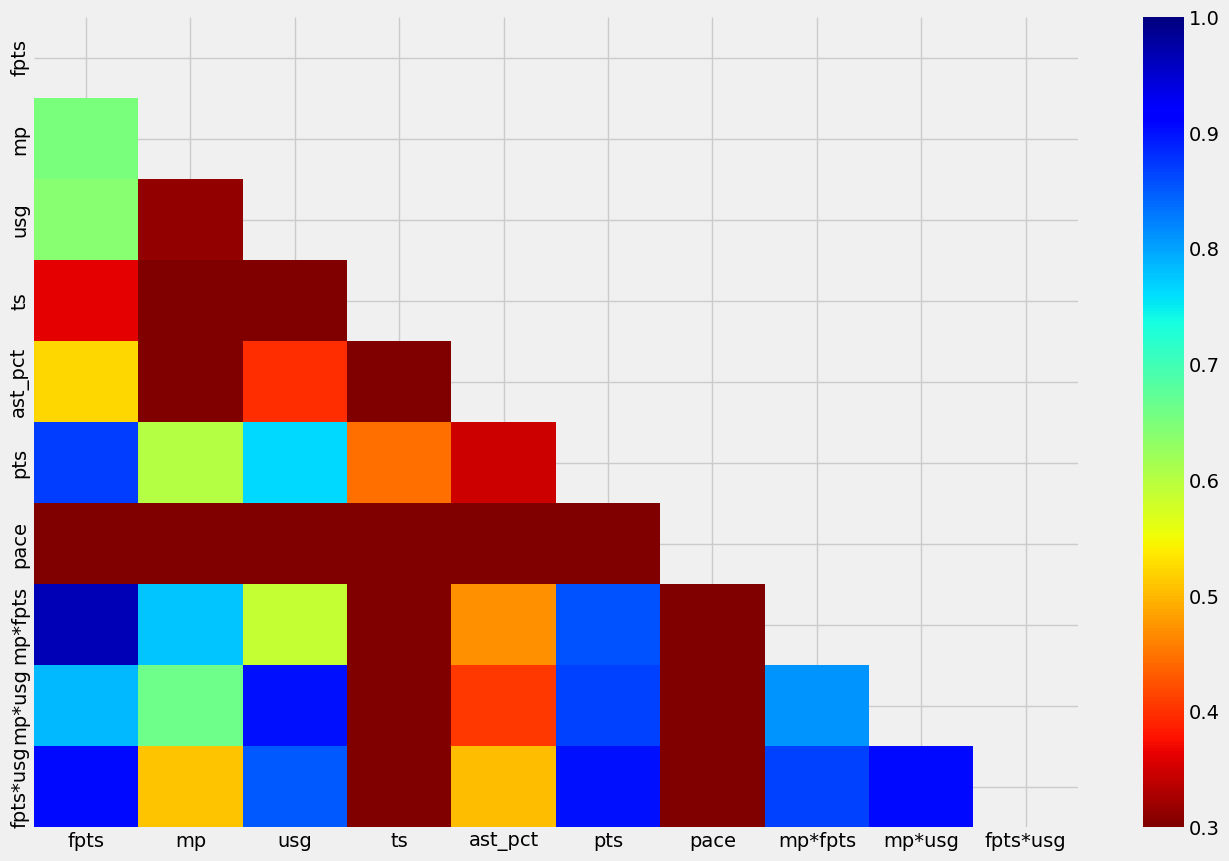

In [5]:
create_heatmap(df, starter=True, product=['mp', 'fpts', 'usg']);

In [6]:
df['fpts'].describe()

count    17665.000
mean        21.989
std         15.614
min         -1.500
25%          9.750
50%         19.500
75%         31.750
max        105.500
Name: fpts, dtype: float64

In [7]:
df['mp'].describe()

count    17665.000
mean        22.432
std         10.949
min          0.000
25%         14.317
50%         23.433
75%         31.450
max         49.683
Name: mp, dtype: float64

In [8]:
df['usg'].describe()

count    17665.000
mean        18.740
std          9.382
min          0.000
25%         12.700
50%         18.200
75%         24.400
max        100.000
Name: usg, dtype: float64

<Axes: ylabel='Frequency'>

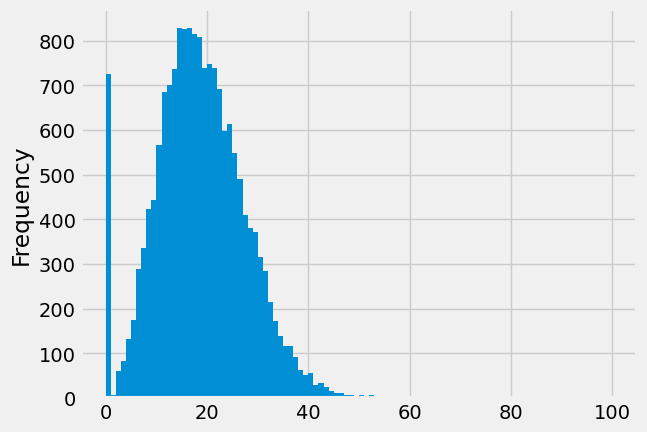

In [14]:
# (df
#  .groupby('name')
#  ['usg']
#  .agg(['median'])
#  .describe()
# )
df['usg'].plot.hist(bins=100)

In [10]:
df['ast_pct'].describe()

count    17665.000
mean        14.336
std         17.872
min      -1000.000
25%          0.000
50%         11.400
75%         21.600
max        100.000
Name: ast_pct, dtype: float64

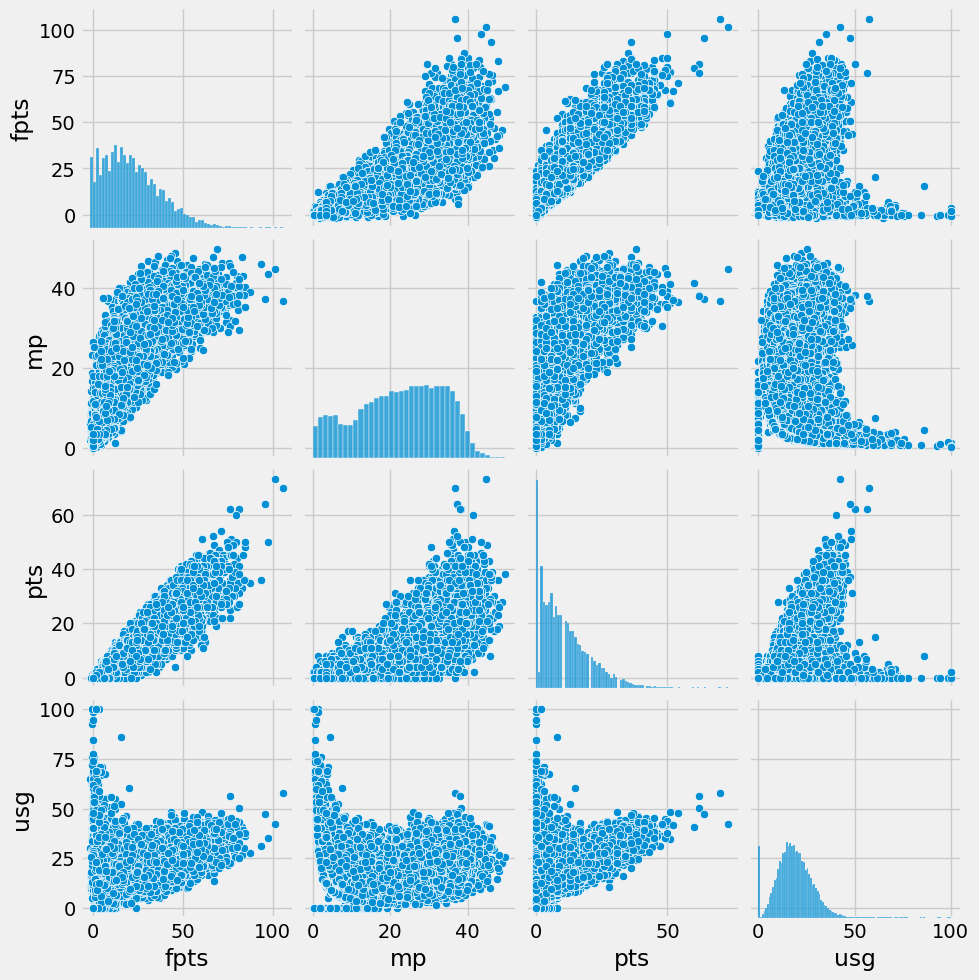

In [11]:
sns.pairplot(
    df[['fpts', 'mp', 'pts', 'usg']]
)